## Kobe Bryant Shot Selection Project

### Team Members: Kit Ha, Vinh Ngo, Johnathan Tahod, Anthony Collado

#### Credit to Kaggle for data and idea. Link to webpage below
#### https://www.kaggle.com/c/kobe-bryant-shot-selection
#### Github: https://github.com/johntahod/KobeBryant_ShotSelection/tree/master

##### *Markdown conventions just to be consistent
# Title
## Headers
### Sections
#### Subpoints? idk
##### Notes/Comments

### Imports and Setting up the data frame + first look at data

In [3]:
import numpy as np
import pandas as pd

kobe_data = pd.read_csv('data.csv')
display(kobe_data.head(10))

full_features = [kobe_data.columns]
print(full_features)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


[Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')]


### Setting up Lists

In [4]:
# Target List (this is our y)
target = ['shot_made_flag']

#### These are features we will not be using.
team_name: This feature will not be used because Kobe has only ever played for the Lakers so this provides no new data.

team_id: This is the same as team_name

matchup: This tells the same information as opponent (eg. Lakers vs Portland)

game_event_id: Don't need to id the game

game_id: Same reason as above

shot_id: Don't need to id the shot

season: Season shouldn't have an effect on the shot <- might want to check this one

game_date: Dates shouldn't effect the shot <- also double check this one

In [5]:
# Features that we will not be using.
unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id', 'season', 'game_date']

#### Removing unused features

In [6]:
removed_features = unused_features
# print(removed_features)

feature_cols = [feature for feature in kobe_data.columns if feature not in removed_features]
# print(feature_cols)

display(kobe_data[feature_cols].head(10))

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent
0,Jump Shot,Jump Shot,33.9723,167,72,-118.1028,10,1,0,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR
1,Jump Shot,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR
2,Jump Shot,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR
3,Jump Shot,Jump Shot,33.8693,138,175,-118.1318,6,1,0,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR
4,Driving Dunk Shot,Dunk,34.0443,0,0,-118.2698,6,2,0,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR
5,Jump Shot,Jump Shot,34.0553,-145,-11,-118.4148,9,3,0,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR
6,Layup Shot,Layup,34.0443,0,0,-118.2698,8,3,0,52,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR
7,Jump Shot,Jump Shot,34.0163,1,28,-118.2688,8,3,0,5,2,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR
8,Jump Shot,Jump Shot,33.9363,-65,108,-118.3348,6,3,0,12,12,1.0,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,POR
9,Running Jump Shot,Jump Shot,33.9193,-33,125,-118.3028,3,3,0,36,12,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,POR


#### Remove spaces from data for fit training

In [7]:
# Not sure who did this but I commented it out. (Maybe this is me. ¯\_(ツ)_/¯ ) -Kit

# from sklearn.preprocessing import LabelEncoder
# y2 = ["A","1","4","F","A","1","4","F"]
# lb = LabelEncoder()
# y = lb.fit_transform(y2)

### Implement One-Hot-Encoding

In [8]:
# Features for One-Hot-Encoding
OHE_features = ['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent']

In [9]:
# import for one hot encoding
from sklearn.preprocessing import OneHotEncoder
dummies = pd.DataFrame()

for feature in OHE_features:
    dummies = pd.concat([dummies, pd.get_dummies(kobe_data[feature])], axis = 'columns')
    dummies.drop(dummies.columns[[-1,]], axis=1, inplace=True)
    
display(dummies.head(10))

,Alley Oop Dunk Shot,Alley Oop Layup shot,Cutting Finger Roll Layup Shot,Cutting Layup Shot,Driving Bank shot,Driving Dunk Shot,Driving Finger Roll Layup Shot,Driving Finger Roll Shot,Driving Floating Bank Jump Shot,Driving Floating Jump Shot,...,ORL,PHI,PHX,POR,SAC,SAS,SEA,TOR,UTA,VAN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
merged = pd.concat([kobe_data[feature_cols], dummies], axis='columns')

display(merged.head(10))

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,ORL,PHI,PHX,POR,SAC,SAS,SEA,TOR,UTA,VAN
0,Jump Shot,Jump Shot,33.9723,167,72,-118.1028,10,1,0,27,...,0,0,0,1,0,0,0,0,0,0
1,Jump Shot,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,22,...,0,0,0,1,0,0,0,0,0,0
2,Jump Shot,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,45,...,0,0,0,1,0,0,0,0,0,0
3,Jump Shot,Jump Shot,33.8693,138,175,-118.1318,6,1,0,52,...,0,0,0,1,0,0,0,0,0,0
4,Driving Dunk Shot,Dunk,34.0443,0,0,-118.2698,6,2,0,19,...,0,0,0,1,0,0,0,0,0,0
5,Jump Shot,Jump Shot,34.0553,-145,-11,-118.4148,9,3,0,32,...,0,0,0,1,0,0,0,0,0,0
6,Layup Shot,Layup,34.0443,0,0,-118.2698,8,3,0,52,...,0,0,0,1,0,0,0,0,0,0
7,Jump Shot,Jump Shot,34.0163,1,28,-118.2688,8,3,0,5,...,0,0,0,1,0,0,0,0,0,0
8,Jump Shot,Jump Shot,33.9363,-65,108,-118.3348,6,3,0,12,...,0,0,0,1,0,0,0,0,0,0
9,Running Jump Shot,Jump Shot,33.9193,-33,125,-118.3028,3,3,0,36,...,0,0,0,1,0,0,0,0,0,0


In [11]:
final = merged.drop(OHE_features, axis='columns')
final_features = [final.columns]
display(final.head(10))

,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,...,ORL,PHI,PHX,POR,SAC,SAS,SEA,TOR,UTA,VAN
0,33.9723,167,72,-118.1028,10,1,0,27,18,NaN,...,0,0,0,1,0,0,0,0,0,0
1,34.0443,-157,0,-118.4268,10,1,0,22,15,0.0,...,0,0,0,1,0,0,0,0,0,0
2,33.9093,-101,135,-118.3708,7,1,0,45,16,1.0,...,0,0,0,1,0,0,0,0,0,0
3,33.8693,138,175,-118.1318,6,1,0,52,22,0.0,...,0,0,0,1,0,0,0,0,0,0
4,34.0443,0,0,-118.2698,6,2,0,19,0,1.0,...,0,0,0,1,0,0,0,0,0,0
5,34.0553,-145,-11,-118.4148,9,3,0,32,14,0.0,...,0,0,0,1,0,0,0,0,0,0
6,34.0443,0,0,-118.2698,8,3,0,52,0,1.0,...,0,0,0,1,0,0,0,0,0,0
7,34.0163,1,28,-118.2688,8,3,0,5,2,NaN,...,0,0,0,1,0,0,0,0,0,0
8,33.9363,-65,108,-118.3348,6,3,0,12,12,1.0,...,0,0,0,1,0,0,0,0,0,0
9,33.9193,-33,125,-118.3028,3,3,0,36,12,0.0,...,0,0,0,1,0,0,0,0,0,0


#### Y value splits

In [12]:
# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target].dropna()
display(y.head(10))


,shot_made_flag
1,0.0
2,1.0
3,0.0
4,1.0
5,0.0
6,1.0
8,1.0
9,0.0
10,0.0
11,1.0


#### X value splits

In [13]:
# Data with all prediction data dropped (so that we don't learn from it)
X = final.dropna(subset=target)
display(X.head(10))


,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,...,ORL,PHI,PHX,POR,SAC,SAS,SEA,TOR,UTA,VAN
1,34.0443,-157,0,-118.4268,10,1,0,22,15,0.0,...,0,0,0,1,0,0,0,0,0,0
2,33.9093,-101,135,-118.3708,7,1,0,45,16,1.0,...,0,0,0,1,0,0,0,0,0,0
3,33.8693,138,175,-118.1318,6,1,0,52,22,0.0,...,0,0,0,1,0,0,0,0,0,0
4,34.0443,0,0,-118.2698,6,2,0,19,0,1.0,...,0,0,0,1,0,0,0,0,0,0
5,34.0553,-145,-11,-118.4148,9,3,0,32,14,0.0,...,0,0,0,1,0,0,0,0,0,0
6,34.0443,0,0,-118.2698,8,3,0,52,0,1.0,...,0,0,0,1,0,0,0,0,0,0
8,33.9363,-65,108,-118.3348,6,3,0,12,12,1.0,...,0,0,0,1,0,0,0,0,0,0
9,33.9193,-33,125,-118.3028,3,3,0,36,12,0.0,...,0,0,0,1,0,0,0,0,0,0
10,33.8063,-94,238,-118.3638,1,3,0,56,25,0.0,...,0,0,0,1,0,0,0,0,0,0
11,33.9173,121,127,-118.1488,11,1,0,0,17,1.0,...,0,0,0,0,0,0,0,0,1,0


#### Prediction data.
#### DO NOT USE IN TRAINING!

In [24]:
final_prediction_data = kobe_data[kobe_data['shot_made_flag'].isnull()]
# print(final_prediction_data)


# Second way to write this
# nan_rows = kobe_data[kobe_data[target].isnull().any(1)]
# print(nan_rows)

### Finding the best single feature for predicting shot made using KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.4, random_state=10)

In [17]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
y_predict = knn.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)

print(accuracy)

0.6004475143496449


In [26]:
scores = []
k_list = [i for i in range(1,20)]


for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

print(scores)

[0.5919836559976651, 0.6112462301780329, 0.6004475143496449, 0.6200992314427474, 0.6050199435742777, 0.6209748029964004, 0.6081330868761553, 0.6216558030936862, 0.6084249440607062, 0.6211693744527678, 0.612997373285339, 0.6197100885300126, 0.6115380873625839, 0.6246716606673801, 0.6168888024126861, 0.6270065181437883, 0.6179589454227065, 0.6288549469792781, 0.6195155170736453]


Text(0, 0.5, 'Testing Accuracy')

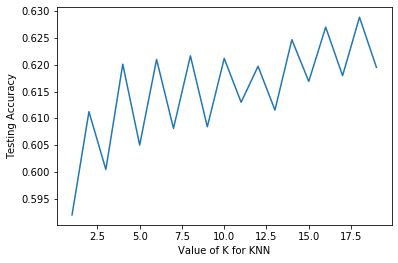

In [27]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_list, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Finding feature using Random Forest

In [ ]:
from warnings import simplefilter # I imported this because I get warning whenever I ran the algorithm
simplefilter(action='ignore', category=FutureWarning) # so I want to take it out instead
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=19, bootstrap=True, random_state=2)

In [ ]:
# Filtering the data
feature_cols = list(final.columns.values)
X = final[feature_cols].dropna()
X = X.drop('shot_made_flag', axis = 'columns')
Y = final['shot_made_flag'].dropna()

In [ ]:
# Split the data, might need some adjustment on this
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.35, random_state = 3)

In [ ]:
# Filtering out the best features for RandomForest using SelectFromModel in sklearn library
from sklearn.feature_selection import SelectFromModel
fslect = SelectFromModel(RandomForest)
fslect.fit(X_train, Y_train)

In [ ]:
# True indicate the features that are important to the assessment of the data
fslect.get_support()

In [ ]:
# new X with best features selected from previously X features table
best_features = X_train.columns[(fslect.get_support())]
X_best = X[best_features]
X_best.head(10)

In [ ]:
# Split the data again now with the best features
X_train, X_test, Y_train, Y_test = train_test_split(X_best,Y, test_size = 0.35, random_state = 3)

In [ ]:
# Random Forrest Algorithm
RandomForest.fit(X_train, Y_train)
Y_predict = RandomForest.predict(X_test)
Accuracy = accuracy_score(Y_test, Y_predict)
RF = RandomForestClassifier()
treeaccuracy_list = cross_val_score(RF, X_best, Y, cv = 10, scoring = 'accuracy')
treeaccuracy_cv = treeaccuracy_list.mean()
print('The Accuracy of Random Forrest:',Accuracy)
print('The Cross-Validation Accuracy of Random Forrest:',treeaccuracy_cv)